## Logistic Map

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def logistic(r, x):
    return r*x*(1-x)

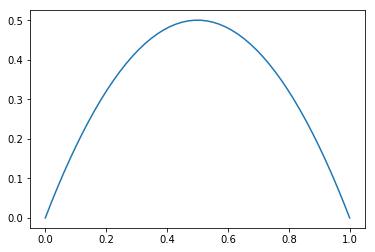

In [3]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
ax.plot(x, logistic(2, x))

In [4]:
n = 1000
r = np.linspace(2.5, 4.0, n)
iterations = 1000
last = 100
x = 1e-5*np.ones(n)

(2.5, 4)

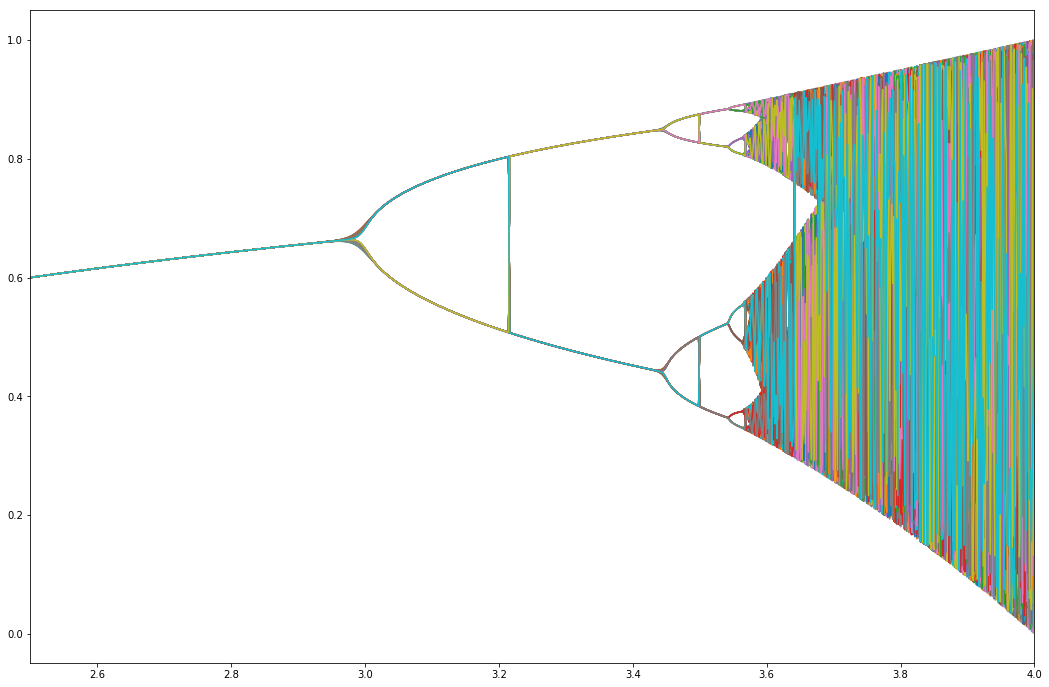

In [6]:
fig, ax = plt.subplots(1, 1, figsize=(18, 12), linewidth=0.2)
for i in range(iterations):
    if i >= (iterations-last):
        ax.plot(r, x)
        x = logistic(r, x)
        
ax.set_xlim(2.5, 4)

In [38]:
x[256]

0.6533059505680033

## Lorenz Map

In [2]:
def lorenz(in_, t, sigma, b, r):
    x = in_[0]
    y = in_[1]
    z = in_[2]
    
    return [sigma*(y-x), r*x - y - x*z, x*y - b*z]

In [3]:
from scipy.integrate import odeint

def get_solution(in_0, tmax, nt, args_tuple):
    t = np.linspace(0, tmax, nt)
    soln = odeint(lorenz, in_0, t, args=args_tuple).T
    return t, soln

In [23]:
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

in_0 = [5.0, 5.0, 5.0]
t_max = 20
t_steps = 5000000
t, [solx, soly, solz] = get_solution(in_0, t_max, t_steps, 
                                            (10.0, 8/3, 28))

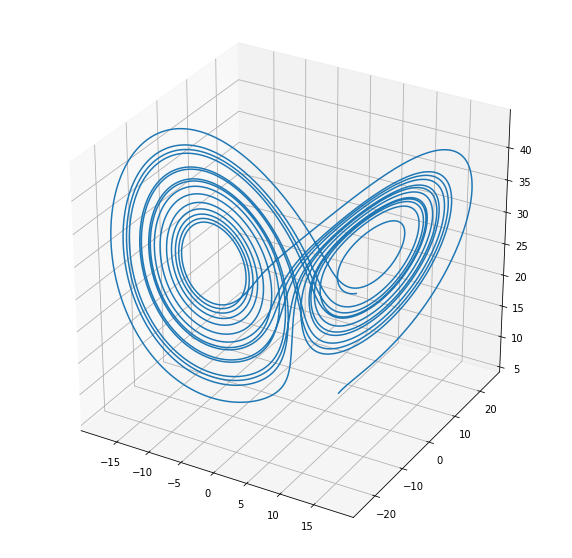

In [20]:
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solx, soly, solz)
plt.show()

To display the chaos, let's start with 2 different inital values, that differ by just 0.00001 and see how they differ after 1 milliion time steps 

In [23]:
t_max = 1000
t_steps = t_max/0.001

in_1 = [5.0, 5.0, 5.0]
t1, [solx1, soly1, solz1] = get_solution(in_1, t_max, t_steps, 
                                            (10.0, 8/3, 80))

in_2 = [5.0001,5.0001,5.0001]
t2, [solx2, soly2, solz2] = get_solution(in_2, t_max, t_steps, 
                                            (10.0, 8/3, 80))

C:\Users\rushi\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  after removing the cwd from sys.path.


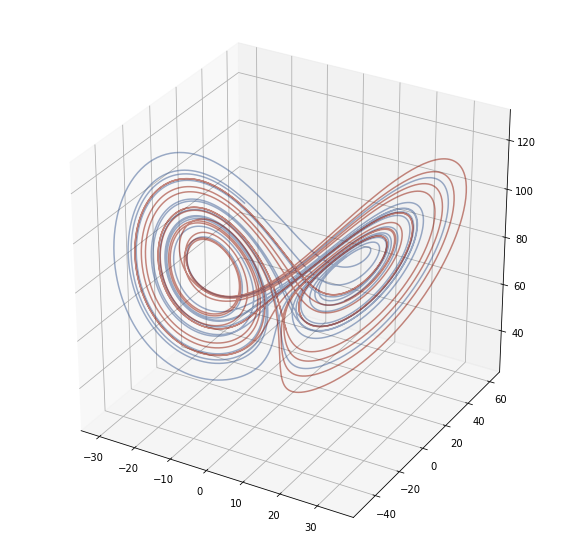

In [24]:
from seaborn import xkcd_palette as xkcd
blue, red = xkcd(['denim blue','brick red'])


fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111, projection='3d')
ax.plot(solx1[-10000:],soly1[-10000:],solz1[-10000:],color=blue,alpha=0.5)
ax.plot(solx2[-10000:],soly2[-10000:],solz2[-10000:],color=red,alpha=0.5)
plt.show()